<a href="https://colab.research.google.com/github/MDAWOODA/airbnb-data/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Default title text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_hotel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Airbnb NYC 2019.csv')


df_hotel.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_hotel.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# checking for null unwanted entries
df_hotel.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df_hotel.shape


(48895, 16)

Removing last_review and review_per_month columns

In [ ]:
new_df_hotel = df_hotel[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
new_df_hotel.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Objective 1 - Learning about different hosts and areas

In [ ]:
hosts_areas = new_df_hotel.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count' ,ascending=False).head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


Highest no. of listings are from Manhattan hosted by Sonder(NYC)

Objective 2 - Learning from predictions(ex- locations,prices,reviews,etc)

In [ ]:
area_reviews = new_df_hotel.groupby(['name','neighbourhood_group','price','minimum_nights'])['number_of_reviews'].count().reset_index()
price_reviews1=area_reviews.sort_values(by='price', ascending=False).head(100)
price_reviews1

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
20219,Furnished room in Astoria apartment,Queens,10000,100,1
27223,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,1
1112,1-BR Lincoln Center,Manhattan,10000,30,1
2224,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999,30,1
36152,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,1
...,...,...,...,...,...
2628,5 Star Luxury 2 BR Suite Heart of Manhattan,Manhattan,2000,2,1
16204,Cozy bedroom in Brooklyn Sunsetpark,Brooklyn,2000,2,1
26931,Lower Park Avenue Pre War,Manhattan,2000,1,1
29995,NY Duplex Apartment in Flatiron,Manhattan,2000,7,1


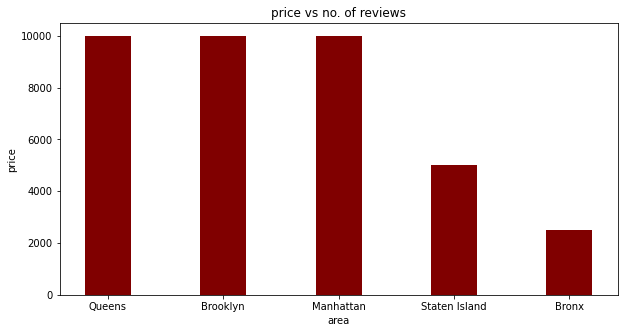

In [ ]:
area = price_reviews1['neighbourhood_group']
price=price_reviews1['price']

fig=plt.figure(figsize=(10,5))

plt.bar(area,price , color='maroon', width= 0.4)

plt.xlabel('area')
plt.ylabel('price')
plt.title('price vs no. of reviews')
plt.show()

In [ ]:
price_reviews = area_reviews.sort_values(by='number_of_reviews', ascending=False).head(100)
price_reviews

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
22522,Hillside Hotel,Queens,135,1,12
26246,Loft Suite @ The Box House Hotel,Brooklyn,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,48,30,10
22523,Hillside Hotel,Queens,165,1,5
23571,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,175,30,5
...,...,...,...,...,...
32537,Perfect Upper West Side Studio,Manhattan,150,4,1
32491,Perfect Nolita apartment,Manhattan,182,2,1
32495,Perfect Place to Stay,Bronx,37,1,1
32533,Perfect UWS Apartment,Manhattan,175,1,1


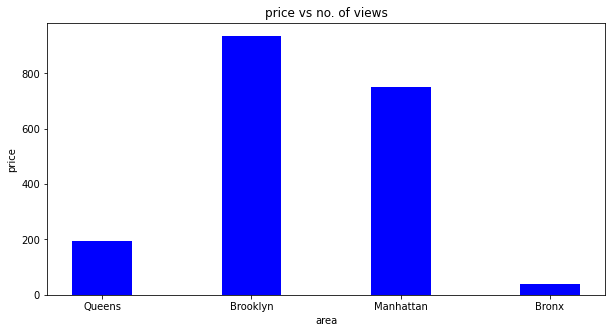

In [ ]:
area= price_reviews['neighbourhood_group']
price=price_reviews['price']

fig = plt.figure(figsize=(10,5))

plt.bar(area, price, color='blue' ,width= 0.4)
plt.xlabel('area')
plt.ylabel('price')
plt.title('price vs no. of views')
plt.show()

Objective 3 - Busisest hosts and why

In [ ]:
busyhost = new_df_hotel.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busyhost = busyhost.sort_values(by='minimum_nights', ascending=False).head(5)
busyhost

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117


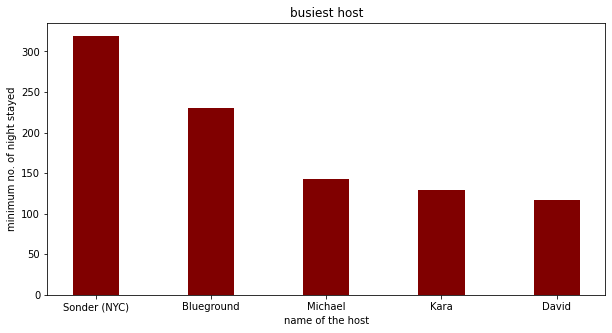

In [ ]:
name = busyhost['host_name']
stayed=busyhost['minimum_nights']

fig = plt.figure(figsize = (10,5))

plt.bar(name, stayed ,color='maroon',width= 0.4)
plt.xlabel('name of the host')
plt.ylabel('minimum no. of night stayed')
plt.title('busiest host')
plt.show()

Objective 4 - 


In [ ]:
trafficareas = new_df_hotel.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
trafficareas = trafficareas.sort_values(by = 'minimum_nights', ascending =False )
trafficareas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


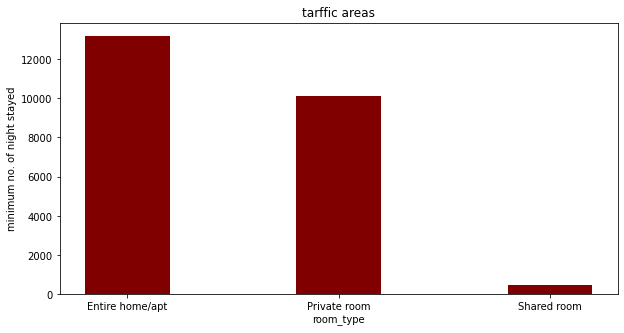

In [ ]:
room_type = trafficareas['room_type']
stayed = trafficareas["minimum_nights"]

fig = plt.figure(figsize = (10,5))

plt.bar(room_type , stayed, color='maroon' ,width=0.4)
plt.xlabel('room_type')
plt.ylabel('minimum no. of night stayed')
plt.title('tarffic areas')
plt.show()